In [1]:
import xarray as xr
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from scipy.signal import savgol_filter
import seaborn as sns 
# Claudio I
ds = xr.open_dataset("/media/cl/ext4/16tb/research_database/bathymetry/gebco/GEBCO_28_Aug_2025_bc7278dd4699/gebco_2025_n-36.4_s-37.4_w-73.7_e-72.75.nc")

In [28]:
# Testing Gebco near-Central-Chile

In [29]:
ds

<xarray.Dataset> Size: 113kB
Dimensions:    (lat: 240, lon: 228)
Coordinates:
  * lat        (lat) float64 2kB -37.4 -37.39 -37.39 ... -36.41 -36.41 -36.4
  * lon        (lon) float64 2kB -73.7 -73.69 -73.69 ... -72.76 -72.76 -72.75
Data variables:
    elevation  (lat, lon) int16 109kB -138 -122 -100 -77 -54 -33 ... 7 8 9 11 20
Attributes: (12/36)
    title:                           The GEBCO_2025 Grid - a continuous terra...
    summary:                         The GEBCO_2025 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/37c52e96-24ea-67ce-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/37c52e96-24ea-67ce-e063-708...
    references:                      DOI: 10.5285/37c52e96-24ea-67ce-e063-708...
    node_offset:                     1.0

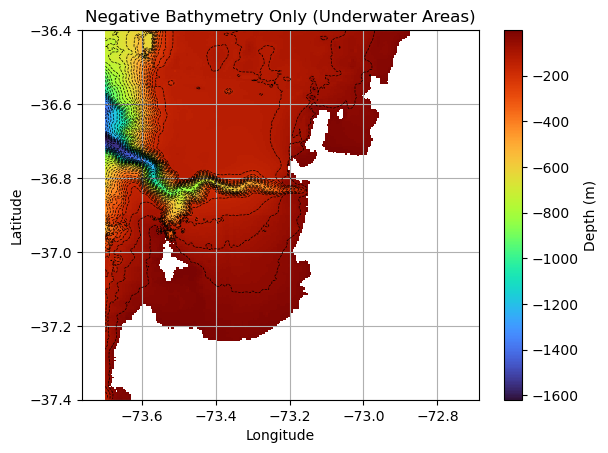

In [24]:
masked_bathy = np.ma.masked_where(ds['elevation'] >= 0, ds['elevation'])
#plt.pcolor(ds['lon'], ds['lat'], ds['elevation'])
pc = plt.pcolormesh(ds['lon'], ds['lat'], masked_bathy, cmap='turbo', shading='auto')
plt.colorbar(pc, label='Depth (m)')
plt.contour(ds['lon'], ds['lat'], masked_bathy, 50, linewidths = 0.5, colors = 'k')
plt.title('Negative Bathymetry Only (Underwater Areas)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()

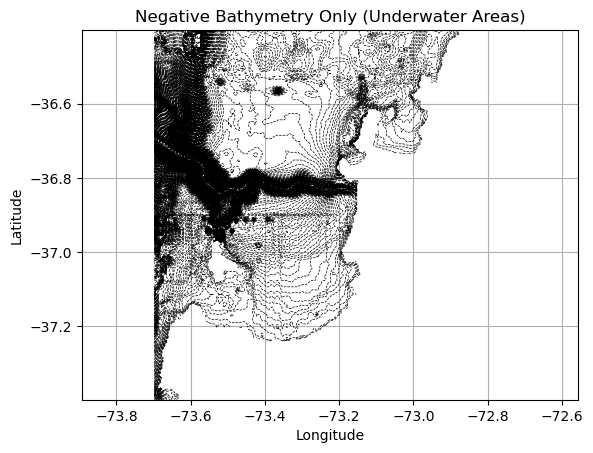

In [26]:
masked_bathy = np.ma.masked_where(ds['elevation'] >= 0, ds['elevation'])
#plt.pcolor(ds['lon'], ds['lat'], ds['elevation'])
plt.contour(ds['lon'], ds['lat'], masked_bathy, 500, linewidths = 0.5, colors = 'k')
plt.title('Negative Bathymetry Only (Underwater Areas)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()

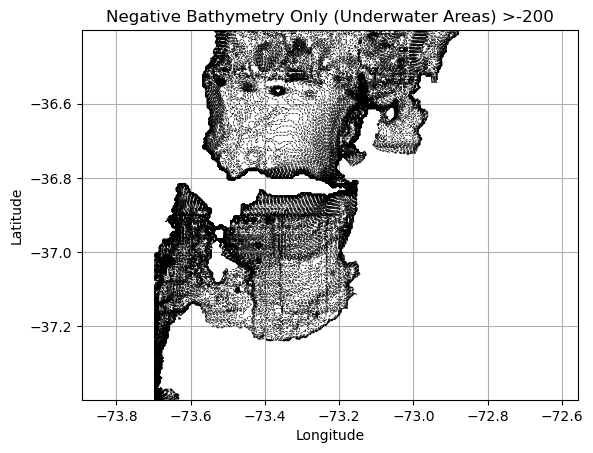

In [27]:
masked_bathy = np.ma.masked_where(ds['elevation'] >= 0, ds['elevation'])
masked_bathy = np.ma.masked_where(masked_bathy <= -200, masked_bathy)
#plt.pcolor(ds['lon'], ds['lat'], ds['elevation'])
plt.contour(ds['lon'], ds['lat'], masked_bathy, 200, linewidths = 0.5, colors = 'k')
plt.title('Negative Bathymetry Only (Underwater Areas) >-200')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()

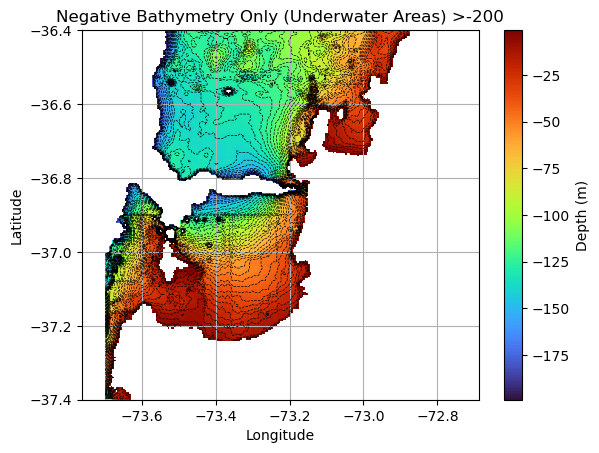

In [16]:
masked_bathy = np.ma.masked_where(ds['elevation'] >= 0, ds['elevation'])
masked_bathy = np.ma.masked_where(masked_bathy <= -200, masked_bathy)
#plt.pcolor(ds['lon'], ds['lat'], ds['elevation'])
pc = plt.pcolormesh(ds['lon'], ds['lat'], masked_bathy, cmap='turbo', shading='auto')
plt.colorbar(pc, label='Depth (m)')
plt.contour(ds['lon'], ds['lat'], masked_bathy, 50, linewidths = 0.5, colors = 'k')
plt.title('Negative Bathymetry Only (Underwater Areas) >-200')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()

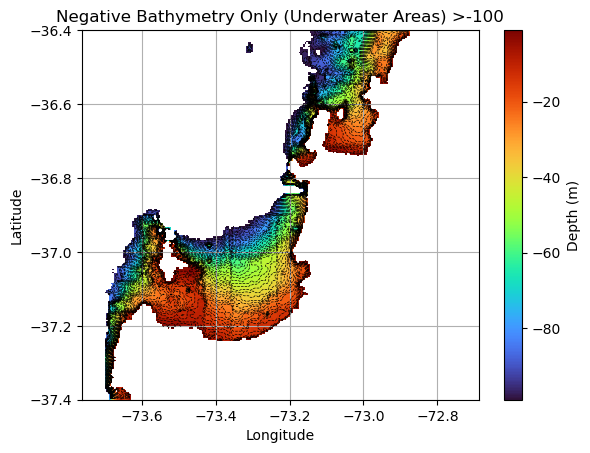

In [19]:
masked_bathy = np.ma.masked_where(ds['elevation'] >= 0, ds['elevation'])
masked_bathy = np.ma.masked_where(masked_bathy <= -100, masked_bathy)
#plt.pcolor(ds['lon'], ds['lat'], ds['elevation'])
pc = plt.pcolormesh(ds['lon'], ds['lat'], masked_bathy, cmap='turbo', shading='auto')
plt.colorbar(pc, label='Depth (m)')
plt.contour(ds['lon'], ds['lat'], masked_bathy, 50, linewidths = 0.5, colors = 'k')
plt.title('Negative Bathymetry Only (Underwater Areas) >-100')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()

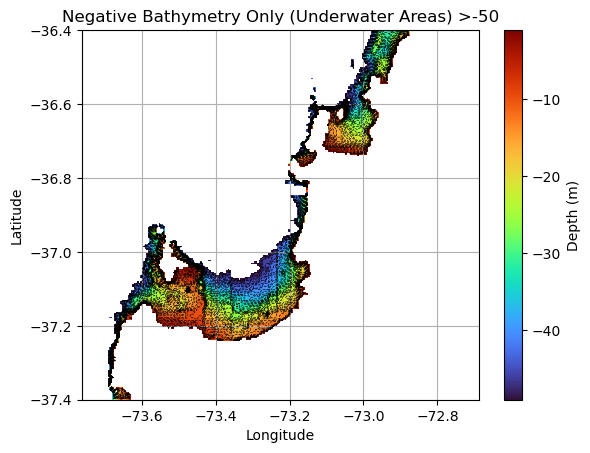

In [20]:
masked_bathy = np.ma.masked_where(ds['elevation'] >= 0, ds['elevation'])
masked_bathy = np.ma.masked_where(masked_bathy <= -50, masked_bathy)
#plt.pcolor(ds['lon'], ds['lat'], ds['elevation'])
pc = plt.pcolormesh(ds['lon'], ds['lat'], masked_bathy, cmap='turbo', shading='auto')
plt.colorbar(pc, label='Depth (m)')
plt.contour(ds['lon'], ds['lat'], masked_bathy, 50, linewidths = 0.5, colors = 'k')
plt.title('Negative Bathymetry Only (Underwater Areas) >-50')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()

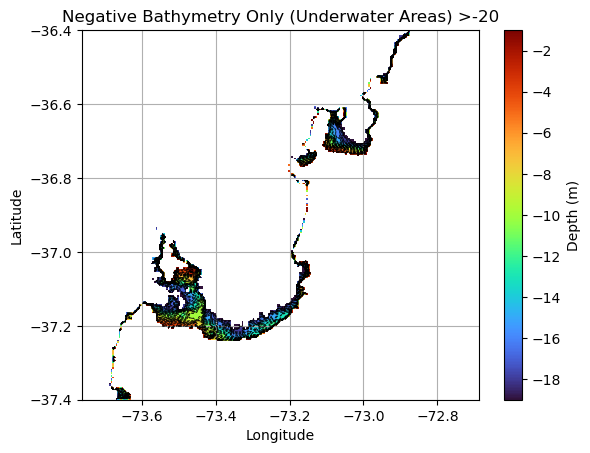

In [21]:
masked_bathy = np.ma.masked_where(ds['elevation'] >= 0, ds['elevation'])
masked_bathy = np.ma.masked_where(masked_bathy <= -20, masked_bathy)
#plt.pcolor(ds['lon'], ds['lat'], ds['elevation'])
pc = plt.pcolormesh(ds['lon'], ds['lat'], masked_bathy, cmap='turbo', shading='auto')
plt.colorbar(pc, label='Depth (m)')
plt.contour(ds['lon'], ds['lat'], masked_bathy, 50, linewidths = 0.5, colors = 'k')
plt.title('Negative Bathymetry Only (Underwater Areas) >-20')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.grid()

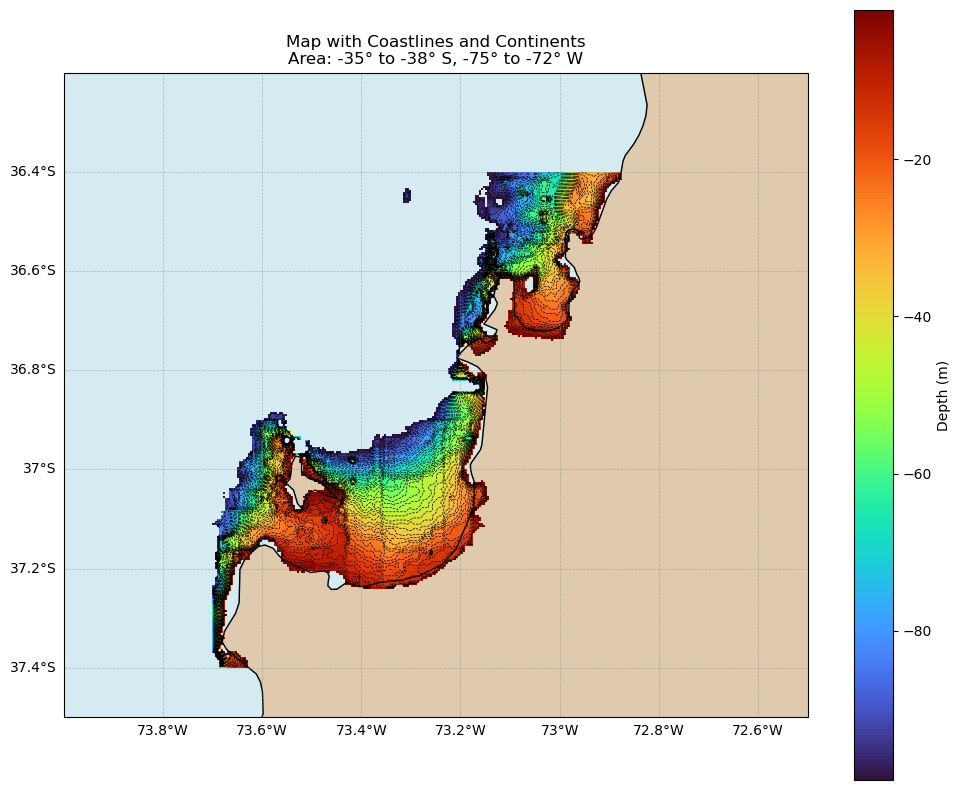

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create figure with Cartopy projection
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent for your specific area: [west, east, south, north]
ax.set_extent([-74, -72.5, -37.5, -36.2], crs=ccrs.PlateCarree())

# Add bathymetry/land features
ax.add_feature(cfeature.LAND, color='tan', alpha=0.7)
ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)

masked_bathy = np.ma.masked_where(ds['elevation'] >= 0, ds['elevation'])
masked_bathy = np.ma.masked_where(masked_bathy <= -100, masked_bathy)
#plt.pcolor(ds['lon'], ds['lat'], ds['elevation'])
pc = plt.pcolormesh(ds['lon'], ds['lat'], masked_bathy, cmap='turbo', shading='auto')
plt.colorbar(pc, label='Depth (m)')
plt.contour(ds['lon'], ds['lat'], masked_bathy, 50, linewidths = 0.5, colors = 'k')

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.title('Map with Coastlines and Continents\nArea: -35° to -38° S, -75° to -72° W')
plt.show()